In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.colors import LogNorm
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import  RBF


import Bgolearn.BGOsampling as BGOS 

 Bgolearn : A Bayesian global optimization package 
 10 Jul 2022, version 1, Bin Cao, MGI, SHU, Shanghai, CHINA.


In [2]:
def True_function(X):
    X = np.array(X)
    Y = 0.013*X**4 - 0.25*X**3 + 1.61*X**2 - 4.1*X + 8
    return Y

In [3]:
def generate_function(data, obs):
    print('------------12 original data-----------')
    data = np.array(data)
    # for one feature dataset
    data_matrix = np.array(data[:,0]).reshape(-1, 1)

    Measured_response = np.zeros(len(data_matrix))
    for i in range(obs):
        Measured_response += np.array(data[:,i+1])
    # for one feature dataset
    Measured_response = Measured_response/obs
    
    Measured_std = []
    for j in range(len(data_matrix)):
        std = np.std(np.array(data[j,1:1+obs]))
        Measured_std.append(std)
    Measured_std = np.array(Measured_std)  
    print('evaluated mean of y :', Measured_response)
    print('evaluated std of y :', Measured_std)
    print('---------------------------------------\n')
    return data_matrix,Measured_response,Measured_std

## design virtual samples

In [4]:
virtual_samples = np.linspace(0,11,100)

## define a callable Kriging model and sampling function

In [5]:
def Sam_function(X,real_std,obs):
    print('--------------Draw samples-------------')
    print('real std of added datum:', real_std)
    X = np.array(X)
    Y = np.zeros(1)
    Y_list = []
    for i in range(obs):
        __sam = 0.013*X**4 - 0.25*X**3 + 1.61*X**2 - 4.1*X + 8 + np.random.normal(loc=0.0, scale=real_std, size=None)
        Y_list.append(__sam)
        Y += __sam
        print(i+1,'-th sampling, result = ', __sam)
    cal_std = np.std(np.array(Y_list))
    print('evaluated mean of added datum:', Y/obs)
    print('evaluated std of added datum:', cal_std)
    print('---------------------------------------\n')
    return Y/obs, np.array(cal_std), np.array(Y_list)


## instantiate Bgolearn

In [6]:
Bgolearn = BGOS.Bgolearn()
method_name = 'REI'


------------12 original data-----------
evaluated mean of y : [6.38302126 5.47159103 4.62333861 4.45561327 4.45288222 4.66633633
 4.60958967 4.62022357 4.74050698 4.45448135 5.94232697 7.79008494]
evaluated std of y : [0.31854553 0.36548063 0.05840252 0.72653212 0.30438189 0.24369472
 0.0862756  0.38254565 0.23908561 0.10964916 0.20850551 0.21403299]
---------------------------------------

current optimal is : 4.423457638847608
The next datum recomended by Reinterpolation Expected Improvement : 
 x =  [8.33333333]
--------------Draw samples-------------
real std of added datum: 0.2
1 -th sampling, result =  3.611703564612519
2 -th sampling, result =  3.672838409633191
3 -th sampling, result =  3.494472468413371
4 -th sampling, result =  3.6278981644906354
5 -th sampling, result =  3.7485022384498663
evaluated mean of added datum: [3.63108297]
evaluated std of added datum: 0.08316121069984257
---------------------------------------

1-th iteration 
 new added datum: [8.3, array([3.6311

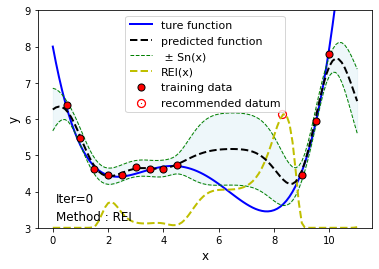

current optimal is : 3.7050856423617957
The next datum recomended by Reinterpolation Expected Improvement : 
 x =  [8.11111111]
--------------Draw samples-------------
real std of added datum: 0.4
1 -th sampling, result =  3.5532218394595043
2 -th sampling, result =  3.5920098617693856
3 -th sampling, result =  3.410711042268648
4 -th sampling, result =  3.4908601339785434
5 -th sampling, result =  3.433113917286843
evaluated mean of added datum: [3.49598336]
evaluated std of added datum: 0.0689166380725415
---------------------------------------

2-th iteration 
 new added datum: [8.1, array([3.496])]


<Figure size 432x288 with 0 Axes>

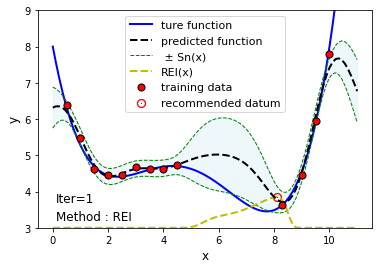

current optimal is : 3.5877229717822567
The next datum recomended by Reinterpolation Expected Improvement : 
 x =  [7.88888889]
--------------Draw samples-------------
real std of added datum: 0.5
1 -th sampling, result =  3.8659089060537917
2 -th sampling, result =  4.195801435657234
3 -th sampling, result =  3.915739080679591
4 -th sampling, result =  3.467884348762343
5 -th sampling, result =  3.4602451226132573
evaluated mean of added datum: [3.78111578]
evaluated std of added datum: 0.28225853702118675
---------------------------------------

3-th iteration 
 new added datum: [7.9, array([3.7811])]


<Figure size 432x288 with 0 Axes>

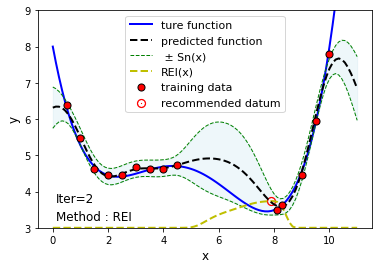

current optimal is : 3.5999144411722956
The next datum recomended by Reinterpolation Expected Improvement : 
 x =  [8.22222222]
--------------Draw samples-------------
real std of added datum: 0.7
1 -th sampling, result =  3.958018753778838
2 -th sampling, result =  2.5299541597756052
3 -th sampling, result =  5.065740237911767
4 -th sampling, result =  3.4319146310343407
5 -th sampling, result =  3.7083726177315928
evaluated mean of added datum: [3.73880008]
evaluated std of added datum: 0.8203950240831999
---------------------------------------

4-th iteration 
 new added datum: [8.2, array([3.7388])]


<Figure size 432x288 with 0 Axes>

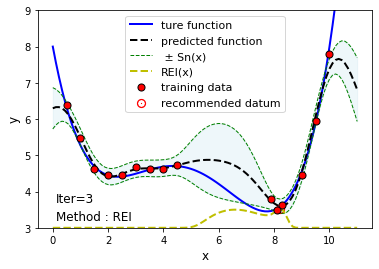

current optimal is : 3.635955643771508
The next datum recomended by Reinterpolation Expected Improvement : 
 x =  [6.55555556]
--------------Draw samples-------------
real std of added datum: 0.6
1 -th sampling, result =  4.625002221190005
2 -th sampling, result =  2.5940389550305856
3 -th sampling, result =  4.983889947246658
4 -th sampling, result =  5.051541644891092
5 -th sampling, result =  4.1282149705467654
evaluated mean of added datum: [4.27653755]
evaluated std of added datum: 0.9027964884408698
---------------------------------------

5-th iteration 
 new added datum: [6.6, array([4.2765])]


<Figure size 432x288 with 0 Axes>

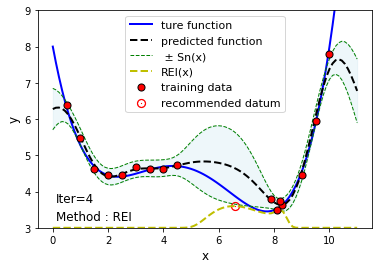

current optimal is : 3.6414379998588897
The next datum recomended by Reinterpolation Expected Improvement : 
 x =  [8.11111111]
--------------Draw samples-------------
real std of added datum: 0.7
1 -th sampling, result =  3.525618822839653
2 -th sampling, result =  3.2922698249946376
3 -th sampling, result =  3.263032621162755
4 -th sampling, result =  1.7815664737050498
5 -th sampling, result =  4.595755427237162
evaluated mean of added datum: [3.29164863]
evaluated std of added datum: 0.8985103194001717
---------------------------------------

6-th iteration 
 new added datum: [8.1, array([3.2916])]


<Figure size 432x288 with 0 Axes>

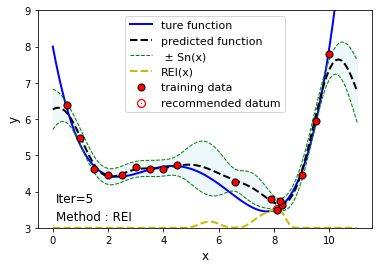

current optimal is : 3.570899307010052
The next datum recomended by Reinterpolation Expected Improvement : 
 x =  [8.]
--------------Draw samples-------------
real std of added datum: 0.7
1 -th sampling, result =  3.9322763867243347
2 -th sampling, result =  3.297260094118201
3 -th sampling, result =  3.987432726594452
4 -th sampling, result =  4.175588201568669
5 -th sampling, result =  3.524959261436417
evaluated mean of added datum: [3.78350333]
evaluated std of added datum: 0.32271618724374906
---------------------------------------

7-th iteration 
 new added datum: [8.0, array([3.7835])]


<Figure size 432x288 with 0 Axes>

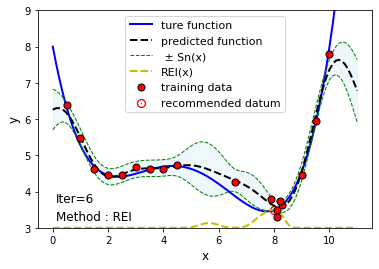

current optimal is : 3.593211638404894
The next datum recomended by Reinterpolation Expected Improvement : 
 x =  [8.11111111]
--------------Draw samples-------------
real std of added datum: 0.5
1 -th sampling, result =  3.744343747791008
2 -th sampling, result =  3.466351298126424
3 -th sampling, result =  3.0811875420952206
4 -th sampling, result =  3.6543737192763115
5 -th sampling, result =  2.8809321177478076
evaluated mean of added datum: [3.36543769]
evaluated std of added datum: 0.3324999795720568
---------------------------------------

8-th iteration 
 new added datum: [8.1, array([3.3654])]


<Figure size 432x288 with 0 Axes>

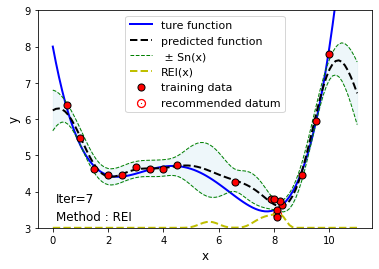

current optimal is : 3.559009781743975
The next datum recomended by Reinterpolation Expected Improvement : 
 x =  [8.11111111]
--------------Draw samples-------------
real std of added datum: 0.3
1 -th sampling, result =  3.578765263236421
2 -th sampling, result =  3.1070802671081
3 -th sampling, result =  3.642837020391158
4 -th sampling, result =  3.5014660250328014
5 -th sampling, result =  3.8878565315649416
evaluated mean of added datum: [3.54360102]
evaluated std of added datum: 0.25374076949716257
---------------------------------------

9-th iteration 
 new added datum: [8.1, array([3.5436])]


<Figure size 432x288 with 0 Axes>

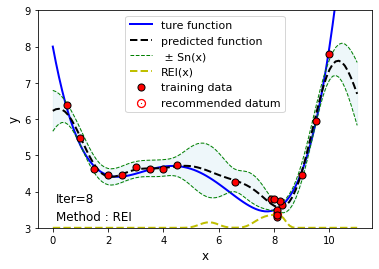

current optimal is : 3.5547474374313293
The next datum recomended by Reinterpolation Expected Improvement : 
 x =  [8.11111111]
--------------Draw samples-------------
real std of added datum: 0.3
1 -th sampling, result =  3.3372812254303525
2 -th sampling, result =  3.7355554121382153
3 -th sampling, result =  3.195571892664741
4 -th sampling, result =  3.2016764581219532
5 -th sampling, result =  3.3965144412085815
evaluated mean of added datum: [3.37331989]
evaluated std of added datum: 0.1970315529614713
---------------------------------------

10-th iteration 
 new added datum: [8.1, array([3.3733])]


<Figure size 432x288 with 0 Axes>

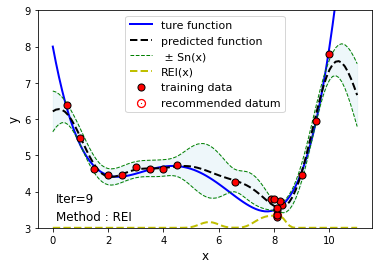

current optimal is : 3.5333443080990463
The next datum recomended by Reinterpolation Expected Improvement : 
 x =  [7.88888889]
--------------Draw samples-------------
real std of added datum: 0.6
1 -th sampling, result =  2.707869951120753
2 -th sampling, result =  3.840322846418257
3 -th sampling, result =  4.217888873149132
4 -th sampling, result =  3.015275202451635
5 -th sampling, result =  3.4016354610370034
evaluated mean of added datum: [3.43659847]
evaluated std of added datum: 0.5446446599698859
---------------------------------------

11-th iteration 
 new added datum: [7.9, array([3.4366])]


<Figure size 432x288 with 0 Axes>

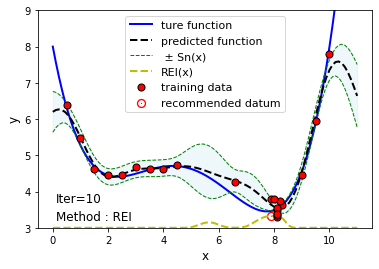

Searching is defeated


<Figure size 432x288 with 0 Axes>

In [7]:
obs = 5
guessed_noise_std = 0.3

data = pd.read_csv('data.csv')
data_matrix, Measured_response,Measured_std = generate_function(data,obs)
Y1=data.iloc[:,1:]

for i in range(500):
    plt.figure()
    ax1 = plt.subplot()
    ax1.set_ylim([3, 9])
    
   
    class Kriging_model(object):
        def fit_pre(self,xtrain,ytrain,xtest):
            # instantiated model
            kernel = RBF() 
            mdoel = GaussianProcessRegressor(kernel=kernel,normalize_y=True,alpha = guessed_noise_std**2).fit(xtrain,ytrain)
            # defined the attribute's outputs
            mean,std = mdoel.predict(xtest,return_std=True)
            return mean,std  
    

    y_mean_pre,y_mean_std = Kriging_model().fit_pre(data_matrix, Measured_response, virtual_samples.reshape(-1,1))
    ax1.scatter(data_matrix,Measured_response,c='r',s=50,zorder=10,edgecolors=(0,0,0),label="training data")
    ax1.plot(virtual_samples,True_function(virtual_samples),'b',lw=2,label="ture function")
    ax1.plot(virtual_samples,y_mean_pre,'k--',lw=2,zorder=9,label="predicted function")
    ax1.fill_between(virtual_samples,y_mean_pre-y_mean_std,y_mean_pre+y_mean_std,alpha=0.2,color='lightblue')
    ax1.plot(virtual_samples,y_mean_pre-y_mean_std,'g--',lw=1,label=' ± Sn(x)') 
    ax1.plot(virtual_samples,y_mean_pre+y_mean_std,'g--',lw=1)

    
    Bgolearn = BGOS.Bgolearn()
    # min_search = False:  searching the global maximum
    model = Bgolearn.fit(Kriging_model,data_matrix,Measured_response,virtual_samples,opt_num = 1,min_search = True)
    # recall the utility function 

    _return = model.Reinterpolation_EI()*10 + 3
    
    index = np.random.choice(np.flatnonzero(_return == _return.max()))
    recommend = virtual_samples[index]
    ax1.plot(virtual_samples,_return,'y--',lw=2,label='{name}(x)'.format(name = method_name))
    
    # give an intrinsic std to recommended datum
    sam_std = round(random.uniform(0.1,0.7),1)
    datum_y, datum_std, Y_list = Sam_function(round(recommend,1),sam_std,obs)
    Measured_std = np.append(Measured_std,datum_std)
    data_matrix = np.append(data_matrix,np.round(recommend,1)).reshape(-1,1)
    Measured_response = np.append(Measured_response,np.round(datum_y,4))
    Y1 = np.append(Y1,Y_list)
 
    Measured_std1=(pd.DataFrame(Measured_std.reshape(len(Measured_std),1),columns=['Measured_std']))
    Measured_response1=(pd.DataFrame(Measured_response.reshape(len(Measured_std),1),columns=['Measured_response']))
    data_matrix1=(pd.DataFrame(data_matrix.reshape(len(data_matrix),1),columns=['x']))
    Y1=(pd.DataFrame(Y1.reshape(len(data_matrix),5)))
    data_iter=(np.hstack((data_matrix1,Measured_response1,Measured_std1,Y1)))
    
 
    
    print("{num}-th iteration".format(num = i + 1),'\n', 'new added datum:',([np.round(recommend,1),np.round(datum_y,4)]))
    ax1.scatter(round(recommend,1),_return[index],c='red',s=1.5,linewidths=8,label="recommended datum") 
    
    
    plt.text(0.1,3.2,'Method : {name}'.format(name = method_name),fontsize=12,color='k')
    plt.text(0.1,3.7,'Iter={}'.format(i),fontsize=12,color='k')
    plt.xlabel('x',fontsize = 12)
    plt.ylabel('y',fontsize = 12)
    plt.legend(fontsize = 11)
    plt.savefig('{name}-sd_{sdlevel}-obs_{obstime}-{num}.png'.format(name = method_name,sdlevel=guessed_noise_std,obstime = obs,num = i),dpi=800)
    plt.show()
    plt.clf()
    if 7.6 <= round(recommend,1) <= 7.8:
        break
    elif i>=10:
        print('Searching is defeated')
        break
data_iter=pd.DataFrame(data_iter.reshape(len(data_matrix),8),columns=['x','y_mean',"y_sd","y1","y2","y3","y4","y5"])
data_iter.to_csv('sd{:.2f}data.csv'.format(guessed_noise_std),float_format='%.4f') #保留两位小数


------------12 original data-----------
evaluated mean of y : [6.38302126 5.47159103 4.62333861 4.45561327 4.45288222 4.66633633
 4.60958967 4.62022357 4.74050698 4.45448135 5.94232697 7.79008494]
evaluated std of y : [0.31854553 0.36548063 0.05840252 0.72653212 0.30438189 0.24369472
 0.0862756  0.38254565 0.23908561 0.10964916 0.20850551 0.21403299]
---------------------------------------

current optimal is : 4.473667528516746
The next datum recomended by Reinterpolation Expected Improvement : 
 x =  [8.22222222]
--------------Draw samples-------------
real std of added datum: 0.7
1 -th sampling, result =  5.371414267731945
2 -th sampling, result =  2.5369435622014853
3 -th sampling, result =  3.7241392309306893
4 -th sampling, result =  1.677072860200561
5 -th sampling, result =  4.084919355184412
evaluated mean of added datum: [3.47889786]
evaluated std of added datum: 1.2761563356595054
---------------------------------------

1-th iteration 
 new added datum: [8.2, array([3.4789]

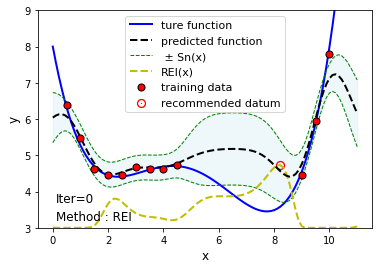

current optimal is : 3.7168242751419465
The next datum recomended by Reinterpolation Expected Improvement : 
 x =  [7.77777778]
--------------Draw samples-------------
real std of added datum: 0.2
1 -th sampling, result =  3.3227364012464102
2 -th sampling, result =  3.589928924688202
3 -th sampling, result =  3.472334399540726
4 -th sampling, result =  3.689556661886798
5 -th sampling, result =  3.162330649969413
evaluated mean of added datum: [3.44737741]
evaluated std of added datum: 0.18781992023123278
---------------------------------------

2-th iteration 
 new added datum: [7.8, array([3.4474])]


<Figure size 432x288 with 0 Axes>

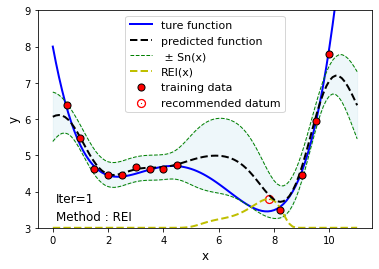

<Figure size 432x288 with 0 Axes>

In [8]:
obs = 5
guessed_noise_std = 0.5

data = pd.read_csv('data.csv')
data_matrix, Measured_response,Measured_std = generate_function(data,obs)
Y1=data.iloc[:,1:]

for i in range(500):
    plt.figure()
    ax1 = plt.subplot()
    ax1.set_ylim([3, 9])
    
   
    class Kriging_model(object):
        def fit_pre(self,xtrain,ytrain,xtest):
            # instantiated model
            kernel = RBF() 
            mdoel = GaussianProcessRegressor(kernel=kernel,normalize_y=True,alpha = guessed_noise_std**2).fit(xtrain,ytrain)
            # defined the attribute's outputs
            mean,std = mdoel.predict(xtest,return_std=True)
            return mean,std  
    

    y_mean_pre,y_mean_std = Kriging_model().fit_pre(data_matrix, Measured_response, virtual_samples.reshape(-1,1))
    ax1.scatter(data_matrix,Measured_response,c='r',s=50,zorder=10,edgecolors=(0,0,0),label="training data")
    ax1.plot(virtual_samples,True_function(virtual_samples),'b',lw=2,label="ture function")
    ax1.plot(virtual_samples,y_mean_pre,'k--',lw=2,zorder=9,label="predicted function")
    ax1.fill_between(virtual_samples,y_mean_pre-y_mean_std,y_mean_pre+y_mean_std,alpha=0.2,color='lightblue')
    ax1.plot(virtual_samples,y_mean_pre-y_mean_std,'g--',lw=1,label=' ± Sn(x)') 
    ax1.plot(virtual_samples,y_mean_pre+y_mean_std,'g--',lw=1)

    
    Bgolearn = BGOS.Bgolearn()
    # min_search = False:  searching the global maximum
    model = Bgolearn.fit(Kriging_model,data_matrix,Measured_response,virtual_samples,opt_num = 1,min_search = True)
    # recall the utility function 

    _return = model.Reinterpolation_EI()*10 + 3
    
    index = np.random.choice(np.flatnonzero(_return == _return.max()))
    recommend = virtual_samples[index]
    ax1.plot(virtual_samples,_return,'y--',lw=2,label='{name}(x)'.format(name = method_name))
    
    # give an intrinsic std to recommended datum
    sam_std = round(random.uniform(0.1,0.7),1)
    datum_y, datum_std, Y_list = Sam_function(round(recommend,1),sam_std,obs)
    Measured_std = np.append(Measured_std,datum_std)
    data_matrix = np.append(data_matrix,np.round(recommend,1)).reshape(-1,1)
    Measured_response = np.append(Measured_response,np.round(datum_y,4))
    Y1 = np.append(Y1,Y_list)
 
    Measured_std1=(pd.DataFrame(Measured_std.reshape(len(Measured_std),1),columns=['Measured_std']))
    Measured_response1=(pd.DataFrame(Measured_response.reshape(len(Measured_std),1),columns=['Measured_response']))
    data_matrix1=(pd.DataFrame(data_matrix.reshape(len(data_matrix),1),columns=['x']))
    Y1=(pd.DataFrame(Y1.reshape(len(data_matrix),5)))
    data_iter=(np.hstack((data_matrix1,Measured_response1,Measured_std1,Y1)))
    
 
    
    print("{num}-th iteration".format(num = i + 1),'\n', 'new added datum:',([np.round(recommend,1),np.round(datum_y,4)]))
    ax1.scatter(round(recommend,1),_return[index],c='red',s=1.5,linewidths=8,label="recommended datum") 
    
    
    plt.text(0.1,3.2,'Method : {name}'.format(name = method_name),fontsize=12,color='k')
    plt.text(0.1,3.7,'Iter={}'.format(i),fontsize=12,color='k')
    plt.xlabel('x',fontsize = 12)
    plt.ylabel('y',fontsize = 12)
    plt.legend(fontsize = 11)
    plt.savefig('{name}-sd_{sdlevel}-obs_{obstime}-{num}.png'.format(name = method_name,sdlevel=guessed_noise_std,obstime = obs,num = i),dpi=800)
    plt.show()
    plt.clf()
    if 7.6 <= round(recommend,1) <= 7.8:
        break
    elif i>=10:
        print('Searching is defeated')
        break
data_iter=pd.DataFrame(data_iter.reshape(len(data_matrix),8),columns=['x','y_mean',"y_sd","y1","y2","y3","y4","y5"])
data_iter.to_csv('sd{:.2f}data.csv'.format(guessed_noise_std),float_format='%.4f') #保留两位小数


------------12 original data-----------
evaluated mean of y : [6.38302126 5.47159103 4.62333861 4.45561327 4.45288222 4.66633633
 4.60958967 4.62022357 4.74050698 4.45448135 5.94232697 7.79008494]
evaluated std of y : [0.31854553 0.36548063 0.05840252 0.72653212 0.30438189 0.24369472
 0.0862756  0.38254565 0.23908561 0.10964916 0.20850551 0.21403299]
---------------------------------------

current optimal is : 4.547688416227402
The next datum recomended by Reinterpolation Expected Improvement : 
 x =  [7.66666667]
--------------Draw samples-------------
real std of added datum: 0.3
1 -th sampling, result =  3.532109036725937
2 -th sampling, result =  3.2297866355312266
3 -th sampling, result =  3.2597651790208015
4 -th sampling, result =  3.7577214742374134
5 -th sampling, result =  3.6936997060788066
evaluated mean of added datum: [3.49461641]
evaluated std of added datum: 0.21705024340065218
---------------------------------------

1-th iteration 
 new added datum: [7.7, array([3.49

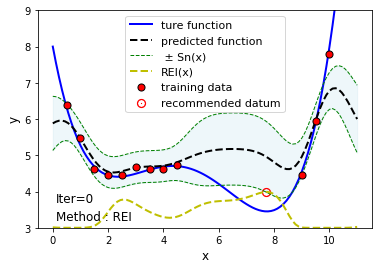

<Figure size 432x288 with 0 Axes>

In [9]:
obs = 5
guessed_noise_std = 0.7

data = pd.read_csv('data.csv')
data_matrix, Measured_response,Measured_std = generate_function(data,obs)
Y1=data.iloc[:,1:]

for i in range(500):
    plt.figure()
    ax1 = plt.subplot()
    ax1.set_ylim([3, 9])
    
   
    class Kriging_model(object):
        def fit_pre(self,xtrain,ytrain,xtest):
            # instantiated model
            kernel = RBF() 
            mdoel = GaussianProcessRegressor(kernel=kernel,normalize_y=True,alpha = guessed_noise_std**2).fit(xtrain,ytrain)
            # defined the attribute's outputs
            mean,std = mdoel.predict(xtest,return_std=True)
            return mean,std  
    

    y_mean_pre,y_mean_std = Kriging_model().fit_pre(data_matrix, Measured_response, virtual_samples.reshape(-1,1))
    ax1.scatter(data_matrix,Measured_response,c='r',s=50,zorder=10,edgecolors=(0,0,0),label="training data")
    ax1.plot(virtual_samples,True_function(virtual_samples),'b',lw=2,label="ture function")
    ax1.plot(virtual_samples,y_mean_pre,'k--',lw=2,zorder=9,label="predicted function")
    ax1.fill_between(virtual_samples,y_mean_pre-y_mean_std,y_mean_pre+y_mean_std,alpha=0.2,color='lightblue')
    ax1.plot(virtual_samples,y_mean_pre-y_mean_std,'g--',lw=1,label=' ± Sn(x)') 
    ax1.plot(virtual_samples,y_mean_pre+y_mean_std,'g--',lw=1)

    
    Bgolearn = BGOS.Bgolearn()
    # min_search = False:  searching the global maximum
    model = Bgolearn.fit(Kriging_model,data_matrix,Measured_response,virtual_samples,opt_num = 1,min_search = True)
    # recall the utility function 

    _return = model.Reinterpolation_EI()*10 + 3
    
    index = np.random.choice(np.flatnonzero(_return == _return.max()))
    recommend = virtual_samples[index]
    ax1.plot(virtual_samples,_return,'y--',lw=2,label='{name}(x)'.format(name = method_name))
    
    # give an intrinsic std to recommended datum
    sam_std = round(random.uniform(0.1,0.7),1)
    datum_y, datum_std, Y_list = Sam_function(round(recommend,1),sam_std,obs)
    Measured_std = np.append(Measured_std,datum_std)
    data_matrix = np.append(data_matrix,np.round(recommend,1)).reshape(-1,1)
    Measured_response = np.append(Measured_response,np.round(datum_y,4))
    Y1 = np.append(Y1,Y_list)
 
    Measured_std1=(pd.DataFrame(Measured_std.reshape(len(Measured_std),1),columns=['Measured_std']))
    Measured_response1=(pd.DataFrame(Measured_response.reshape(len(Measured_std),1),columns=['Measured_response']))
    data_matrix1=(pd.DataFrame(data_matrix.reshape(len(data_matrix),1),columns=['x']))
    Y1=(pd.DataFrame(Y1.reshape(len(data_matrix),5)))
    data_iter=(np.hstack((data_matrix1,Measured_response1,Measured_std1,Y1)))
    
 
    
    print("{num}-th iteration".format(num = i + 1),'\n', 'new added datum:',([np.round(recommend,1),np.round(datum_y,4)]))
    ax1.scatter(round(recommend,1),_return[index],c='red',s=1.5,linewidths=8,label="recommended datum") 
    
    
    plt.text(0.1,3.2,'Method : {name}'.format(name = method_name),fontsize=12,color='k')
    plt.text(0.1,3.7,'Iter={}'.format(i),fontsize=12,color='k')
    plt.xlabel('x',fontsize = 12)
    plt.ylabel('y',fontsize = 12)
    plt.legend(fontsize = 11)
    plt.savefig('{name}-sd_{sdlevel}-obs_{obstime}-{num}.png'.format(name = method_name,sdlevel=guessed_noise_std,obstime = obs,num = i),dpi=800)
    plt.show()
    plt.clf()
    if 7.6 <= round(recommend,1) <= 7.8:
        break
    elif i>=10:
        print('Searching is defeated')
        break
data_iter=pd.DataFrame(data_iter.reshape(len(data_matrix),8),columns=['x','y_mean',"y_sd","y1","y2","y3","y4","y5"])
data_iter.to_csv('sd{:.2f}data.csv'.format(guessed_noise_std),float_format='%.4f') #保留两位小数
